<center><h1> CPE 4040 Spring 2023 Final Project</h1></center>

#### Please follow the instructions in the assignment document to complete this project.  
 
### General guidelines: 
 * Do each part of the assignment in a clean and logical manner.
 * Make comments and offer insight on your codes. Coding with no or poor comments will result in point deduction.
 * This is an individual assignment.
 * __No plagiarism__: you are encouraged to do reseach, however, do your own work. Do not copy-and-paste other people's work.    

### Submission:
 * Submit this notebook file and the pdf version - remember to add your name in the filename.
 * Deadline: 11:59 pm, 4/30 (Sunday)

### The filename, "telco_churn.csv", is the dataset for this analysis.

The dataset contains the following groups of features/columns:

#### Demographic Information
  * **customerID**: A unique identifier for each customer
  * **gender**: The gender of the customer
  * **SeniorCitizen**: Whether the customer is a senior citizen or not (1 = yes, 0 = no)
  * **Partner**: Whether the customer has a partner or not (Yes/No)
  * **Dependents**: Whether the customer has dependents or not (Yes/No)
  
#### Customer Account Information
  * **tenure**: The number of months the customer has been with the company
  * **Contract**: The contract term of the customer (Month-to-month/One year/Two year)
  * **PaperlessBilling**: Whether the customer has paperless billing or not (Yes/No)
  * **PaymentMethod**: The payment method of the customer (Electronic check/Mailed check/Bank transfer (automatic)/Credit card (automatic))
  * **MonthlyCharges**: The amount charged to the customer monthly
  * **TotalCharges**: The total amount charged to the customer
  
#### Service Subscription
  * **PhoneService**: Whether the customer has a phone service or not (Yes/No)
  * **MultipleLines**: Whether the customer has multiple phone lines or not (Yes/No/No phone service)
  * **InternetService**: The type of internet service the customer has (DSL/Fiber optic/No)
  * **OnlineSecurity**: Whether the customer has online security or not (Yes/No/No internet service)
  * **OnlineBackup**: Whether the customer has online backup or not (Yes/No/No internet service)
  * **DeviceProtection**: Whether the customer has device protection or not (Yes/No/No internet service)
  * **TechSupport**: Whether the customer has tech support or not (Yes/No/No internet service)
  * **StreamingTV**: Whether the customer has streaming TV or not (Yes/No/No internet service)
  * **StreamingMovies**: Whether the customer has streaming movies or not (Yes/No/No internet service)
  
#### Finally, the target variable is Churn, which indicates whether the customer has churned or not (Yes/No).

### Import the libraries you need for the analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


### Load the dataset

In [2]:
telco = pd.read_csv("telco_churn.csv")
print(telco.info())
telco.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [3]:
telco.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Section 1: Data Cleaning and Preprocessing:
 1. Examine the basic attributes and statistics of the dataset.
 2. Identify and handle missing values and outliers.

#### The column 'TotalCharges' should not be an object data type. Convert it into a numeric data type.

In [4]:
# Some TotalCharges values are missing, even though info() says they don't have any missing

# use replace & astype to replace any values that are empty
telco['TotalCharges'] = telco['TotalCharges'].replace(' ',0) 
telco['TotalCharges'] = telco['TotalCharges'].astype(float)

<h4>Remove the "customerID" column</h4>

In [5]:
# use drop to drop customerID
telco.drop(columns='customerID',inplace=True)
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [6]:
# Do some more processing: change as many objects as we can to numerical values to make Exploratory Datra Analysis easier
# Set all the columns to integers 
telco['gender'] = telco['gender'].replace('Male',1) # 1 = male, 0 = female
telco['gender'] = telco['gender'].replace('Female',0)
telco['male'] = telco['gender'].astype(int)

telco['MonthlyCont'] = telco['Contract'].replace('Month-to-month',1)
telco['MonthlyCont'] = telco['MonthlyCont'].replace('Two year',0)
telco['MonthlyCont'] = telco['MonthlyCont'].replace('One year',0)
telco['OneYearCont'] = telco['Contract'].replace('One year',1)
telco['OneYearCont'] = telco['OneYearCont'].replace('Two year',0)
telco['OneYearCont'] = telco['OneYearCont'].replace('Month-to-month',0)
telco['TwoYearCont'] = telco['Contract'].replace('Two year',1)
telco['TwoYearCont'] = telco['TwoYearCont'].replace('One year',0)
telco['TwoYearCont'] = telco['TwoYearCont'].replace('Month-to-month',0)

# keep "contract" for easier graphing of a chart later

telco['DSL'] = telco['InternetService'].replace('DSL',1)
telco['DSL'] = telco['DSL'].replace('Fiber optic',0)
telco['Fiber'] = telco['InternetService'].replace('DSL',0)
telco['Fiber'] = telco['Fiber'].replace('Fiber optic',1)
# Create columns to see if the user has DSL or Fiber Optic Internet

telco = telco.drop(columns=['gender']) # drop gender 

for col in telco:
    if col == 'Dependents' or 'PhoneService' or 'MultipleLines' or 'OnlineSecurity' or 'OnlineBackup' or 'DeviceProtection' or 'TechSupport' or 'StreamingTV' or 'StreamingMovies' or 'PaperlessBilling' or 'Churn':
        telco[col] = telco[col].replace('Yes',1) 
        telco[col] = telco[col].replace('No',0)
        telco[col] = telco[col].replace('No phone service',1) # for MultipleLines column
        telco[col] = telco[col].replace('No internet service',0) # for OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies
        #telco[col] = telco[col].astype(int)

In [7]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   Partner           7043 non-null   int64  
 2   Dependents        7043 non-null   int64  
 3   tenure            7043 non-null   int64  
 4   PhoneService      7043 non-null   int64  
 5   MultipleLines     7043 non-null   int64  
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   int64  
 8   OnlineBackup      7043 non-null   int64  
 9   DeviceProtection  7043 non-null   int64  
 10  TechSupport       7043 non-null   int64  
 11  StreamingTV       7043 non-null   int64  
 12  StreamingMovies   7043 non-null   int64  
 13  Contract          7043 non-null   object 
 14  PaperlessBilling  7043 non-null   int64  
 15  PaymentMethod     7043 non-null   object 
 16  MonthlyCharges    7043 non-null   float64


## Section 2: Exploratory Data Analysis (EDA): 
 1. Focus on examining the relationship between the features and the customer churn, and also analyze the distribution of certain features and the relationships between features.
 2. Use appropriate visualization techniques to explore the data.
 3. Present at least __five__ charts and analyses.

C:\Users\justi\AppData\Local\Temp\ipykernel_22952\1841477586.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_telco = telco.corr().round(2)


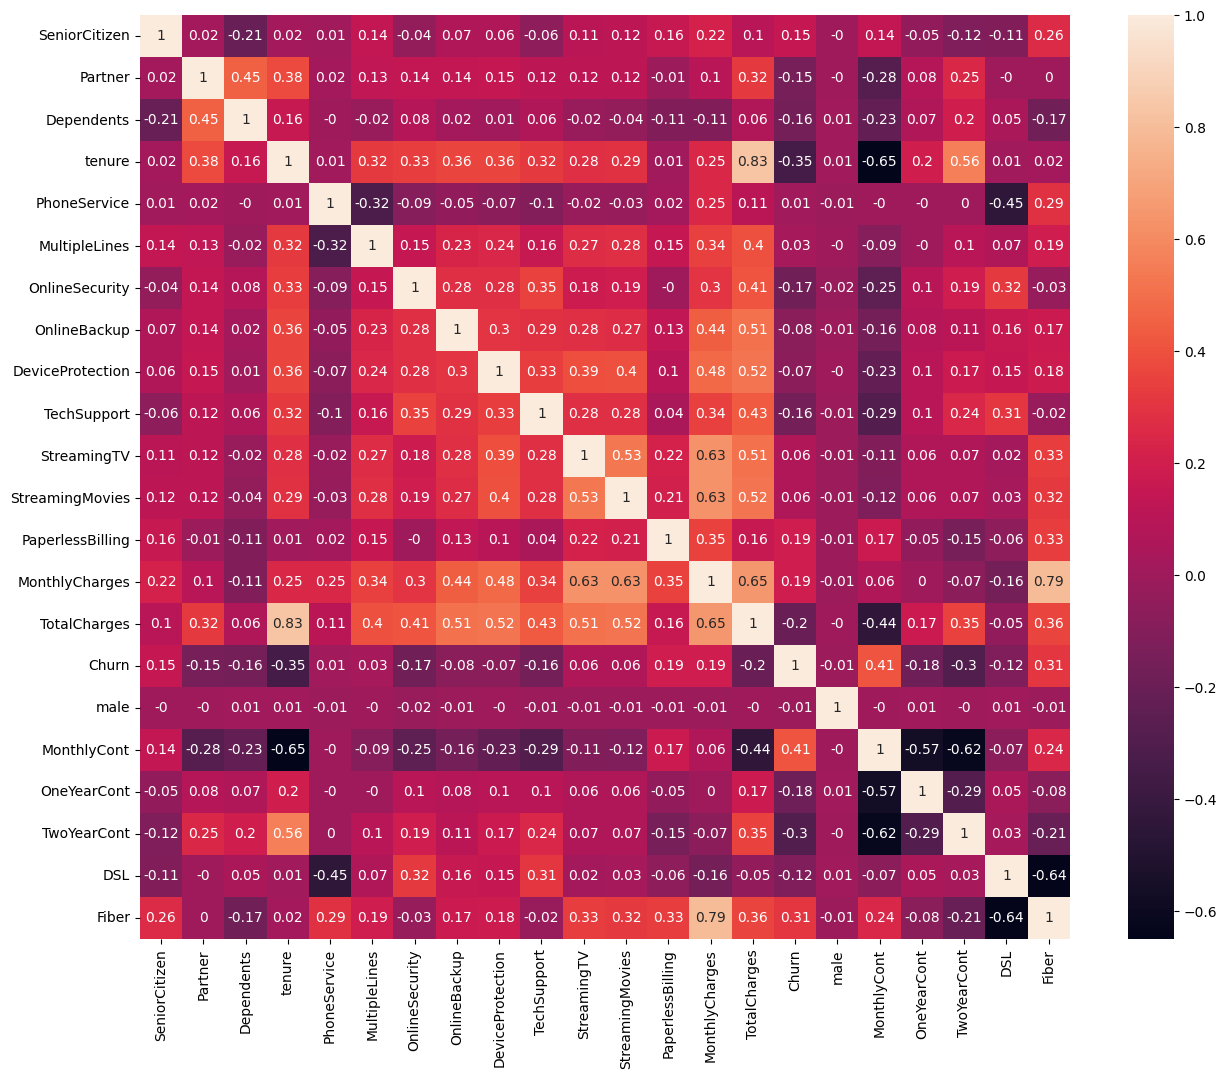

In [8]:
# First, lets try and use a correlation heatmap to observe how related some objects may be to eachother
corr_telco = telco.corr().round(2)
plt.figure(figsize=(15,12))
sns.heatmap(corr_telco, annot=True)
plt.show()



### Correlation Matrix Map
The correlation map is pretty large, and also rather interesting. There are a lot of variables that are examined,
so of course a lot of variables have low correlation. It is very interesting to see the postiive/negative correlations
between varibles. Specifically looking at churn for now, having a Monthly contract, Fiber Optic internet,  
having a high monthly charge, and (surprisingly) paperless billing are the most impactful factors that are 
proportional to churn. On the other side of the spectrum, long tenure, having a Two/One Year Contract, and being 
a long-paying customer (Total Charges) seem to make a customer less likely to churn, with those all being inversely
related to churn. 

Some other interesting relations: An obvious being having a partner and having dependants, and total charges leading to 
a higher tenure. It is interesitng how having a two-year contract and a monthly contract having virtually the opposite
effects on a few things. Importantly, on any additional internet packages the customer has, churn rate, tenure, 
and dependents. Also, noticing how much more expensive fiber internet is than DSL. Lets explore some more and get a more
focused look at how everything relates to Churn



Text(0.5, 1.0, 'Relation of Churn between the categories')

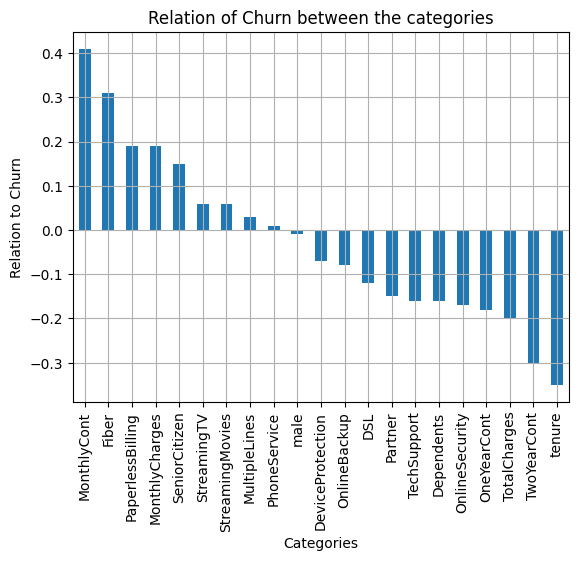

In [9]:
# Create a bar chart of categories up against churn
churn_corr = corr_telco['Churn'].sort_values(ascending=False).drop('Churn')
churn_corr.plot.bar()
plt.grid()
plt.xlabel('Categories')
plt.ylabel('Relation to Churn')
plt.title('Relation of Churn between the categories')


### Bar Chart: How likely is a Category to contribute to Churn?
Similar to what we saw on the heat map, this is a more focused view on what effects a user to churn or not. It seems 
that the top 7 charachteristics contributing to churn are having are: having a monthly contract, having fiber internet,
having paperless billing, having a high monthly charge, not having a two/one year contract (basically having a 
monthly contract) and having a low amount of total charges. Some of these are interesting, and make sense. People with
monthly contracts typically have an easier time cancelling, and don't need to wait months to cancel if they are not
satisfied. On the contrary, two/one year contract holders are likely happy with their services (hence their confidence
in having a long contract). Fiber is also very highly related to churn, possibly telco offers very poor fiber internet?
Paperless billing seems a bit random, and possibly by chance that it has a high correlation to churn. 
 

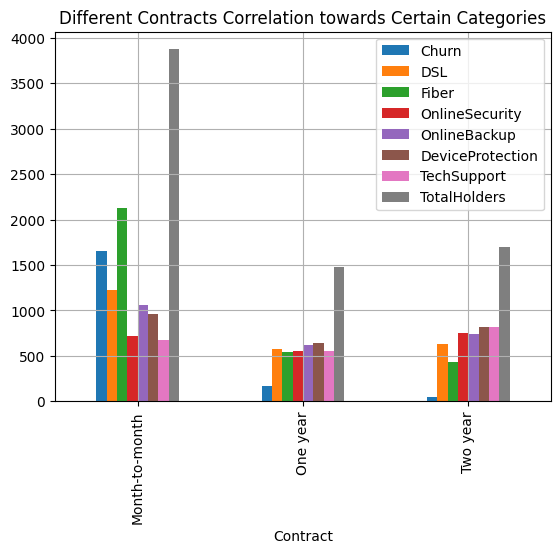

,Churn,DSL,Fiber,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,TotalHolders
Contract,,,,,,,,
Month-to-month,1655,1223,2128,720,1063,957,671,3875
One year,166,570,539,552,622,646,552,1473
Two year,48,628,429,747,744,819,821,1695


In [10]:
# Lets look at a few categories and how they differ when looking at each month

# Groupby Contract first, then use agg to see the count of each category per contract type
monthly_anaylsis = telco.groupby('Contract')
monthly_anaylsis = monthly_anaylsis.agg(Churn=('Churn','sum'),DSL=('DSL','sum'),Fiber=('Fiber','sum'),OnlineSecurity=('OnlineSecurity','sum'),OnlineBackup=('OnlineBackup','sum'),DeviceProtection=('DeviceProtection','sum'),TechSupport=('TechSupport','sum'))
monthly_anaylsis['TotalHolders'] = telco['Contract'].value_counts()
# Plot our result
monthly_anaylsis.plot.bar()
plt.grid()
plt.title('Different Contracts Correlation towards Certain Categories')
plt.show()
monthly_anaylsis

### How does your contract length affect certain categories?
The monthly users have a significantly higher churn rate than One Year and Two Year contract holders. Why is
this? A significant amount use Fiber Internet
over DSL internet. However, people are more likely to buy internet-related packages if you have a longer contract. 
Nothing seems to be a revealing factor that may cause monthly users to cancel, besides them being more likely to
use fiber internet. Overall, the most significant relations we can draw from this graph are that you are less likely
to churn if you have some of the various internet packages Telco offers, and if you have DSL over Fiber internet. 
Contract length seems to be a very large player in terms of churn, as nearly 33% of Month-to-month contract holders
churn, while less than 12% of one and two year contract holders churn. 

C:\Users\justi\AppData\Local\Temp\ipykernel_22952\488093352.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  churns = telco.groupby('Churn').sum()


Text(0.5, 1.0, 'Services that Churns had')

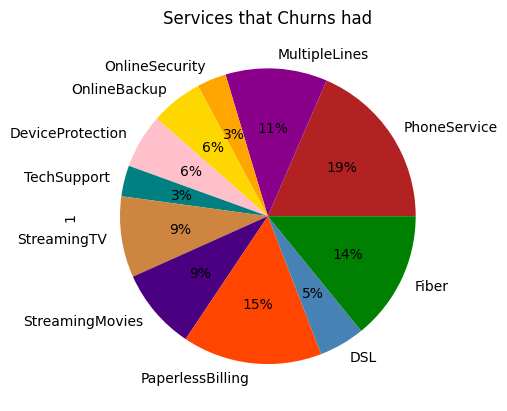

In [11]:
# Lets see all of what people who churn buy from Telco to get a better idea of what they may be unsatisfied about. 

# Groupby Churn, drop any column that isn't a product you can purchase
churns = telco.groupby('Churn').sum()
churns.drop(index=0,columns=['TotalCharges','MonthlyCharges','tenure','MonthlyCont','OneYearCont','TwoYearCont','male','Dependents','Partner','SeniorCitizen'],inplace=True)
churns=churns.squeeze()
#had to manually set colors, glitching occured when I didn't
churns.plot.pie(autopct='%1.0f%%',colors=['firebrick','darkmagenta','orange','gold','pink','teal','peru','indigo','orangered','steelblue','g'])
plt.title('Services that Churns had')
plt.show()

### What services did people who churn have?
This pie chart gives us a lot of insight as to what services may be making customers unhappy and forcing them to
cancel their service (as well as some services that customers may be happy with). People seem rather unhappy with the
phone service, as well as having multiple phones lines with telco. In addition people seem much more unhappy about
fiber internet versus DSL internet. However, people appeared to be relatively happy with the internet-related packages
offered by telco, such as Online Security, Online Backup, Device Protection, and Tech Support. The streaming services
appear to have minimal impact on churns. For some reason as well, paperless billing is a large factor as to why
customers churn, which seems quite odd to me. I thought this was a coincidence at first, since Paperless Billing is
not something that can really have "quality". Maybe there is something else to this.

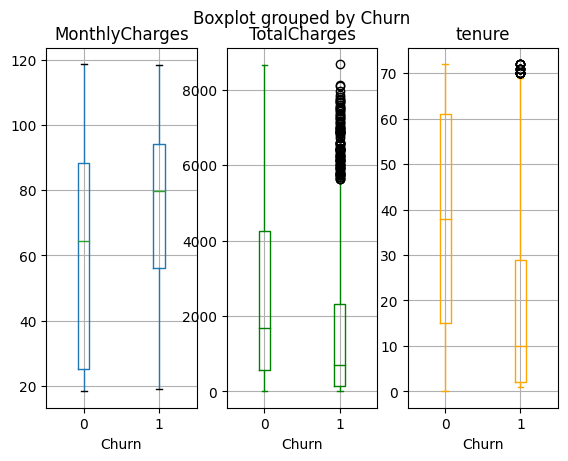

In [12]:
# Lastly, let us see if your monthly/total costs with Telco have any impact on churn, or how they may differ.

#Groupby Churn like last time, then display only Monthly and Total charges, as well as tenure. 
box_telco = telco.loc[:, ['MonthlyCharges','TotalCharges','tenure','Churn']]
fig,axes = plt.subplots(nrows=1,ncols=3)
box_telco.boxplot('MonthlyCharges',by='Churn',ax=axes[0])
box_telco.boxplot('TotalCharges',by='Churn',ax=axes[1],color='g')
box_telco.boxplot('tenure',by='Churn',ax=axes[2],color='orange')
plt.show()

### How much were churns paying compared to non-churns, and how long are they a customer?
This plot reveals a few interesting trends to us. The plot indicates to us that people who churn have an average monthly
higher than non-churns, a lower total charge than churns, and a significantly lower tenure than non-churns. Now, what 
can we make of all of this? It appears that people who churn are most likely people with high monthly charges and have
not been long-tenured customers (by tenure length and total charges). This could result from new customers being 
quickly dissatisfied with their service after having spent more money on average, and immediately trying to find a new 
service that offers similar, but 'better' services than Telco. Longer-tenured customers may also be unhappy about 
some of the offerings by Telco, but could be stubborn to change it. People tend to be loyal to service providers after
being customers for a while, and may be unhappy with quality of some services yet not feel like going through the effort
of actually changing their service provider. This plot does great at giving more description on what a churning customer
is like. 

### Question: Based on the analysis, can you identify some of the more relevant attributes for detecting churn?

### Some important charachteristics of churning customers are:
- High Monthly Charge (due to Fiber internet over DSL?)
- Short Tenured Customer
- Has a Monthly Contract versus 1 or 2 Year Contract
- Has Fiber Internet
- Has Phone Service (and multiple lines)
- Has paperless billing activated
- Does not have many of the additional internet packages

## Section 3: Predictive Modeling

 1. Perform feature engineering and selection to identify the relevant features for predicting customer churn.
 2. Perform __logistic regression__ modeling to classify if a customer is likely to churn.
 3. Evaluate the model performance using metrics such as accuracy, precision, recall, F1-score, etc.
 4. Interpret the coefficients and identify the most important features in the model.

### Section 3.1 Feature Engineering and Selection

### Section 3.1.1 Converting Categorical Features¶
There are many categorial features in this dataset that need to be converted to __"dummy"__ numerical variables.

#### First, convert the target column "Churn" by replacing "Yes" to "1" and "No" to "0".

In [14]:
# Done already in previous steps

<h4>Second, use pd.get_dummies( ) to convert the categorical columns.</h4>
<h4>Remember to use "drop_first = True" option to remove the redundant column.</h4>

In [15]:
train_telco = pd.get_dummies(telco)

train_telco = train_telco.drop(["InternetService_DSL","InternetService_Fiber optic","Contract_Month-to-month","Contract_Two year","Contract_One year"],axis=1)
for col in train_telco:
    print(col)

SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
PaperlessBilling
MonthlyCharges
TotalCharges
Churn
male
MonthlyCont
OneYearCont
TwoYearCont
DSL
Fiber
InternetService_0
PaymentMethod_Bank transfer (automatic)
PaymentMethod_Credit card (automatic)
PaymentMethod_Electronic check
PaymentMethod_Mailed check


### Section 3.1.2 Normalizing Data in X (Features)

**Since we want to classify whether a customer is like to cancel the service, the output (target) will be the "Churn" column. The rest of the columns will be the input (features). So you will drop the Churn column from the dataset and make it X and pick the Churn column and make it y.**

In [16]:
X = train_telco.drop("Churn",axis=1)
Y = train_telco['Churn']

#### This step will help the performace, as well as yield a better interpretation of the regression model. 
#### Follow the instruction below:
   * Calcuate the means and standard deviation for each column of **X** 
   * Normalize each column of **X** by the equation: **X = $\frac{(X - means)}{stdev}$**

In [17]:
means = np.mean(X, axis=1)
std = np.std(X, axis=1)

X = (X - X.mean()) / X.std()
X

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,MonthlyCont,OneYearCont,TwoYearCont,DSL,Fiber,InternetService_0,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.439885,1.034457,-0.653965,-1.277354,-3.053794,0.963261,-0.633888,1.378143,-0.723916,-0.639393,...,0.904120,-0.514213,-0.562935,1.381614,-0.885597,-0.52589,-0.529848,-0.525010,1.406319,-0.544768
1,-0.439885,-0.966554,-0.653965,0.066323,0.327415,-1.037992,1.577342,-0.725511,1.381179,-0.639393,...,-1.105891,1.944444,-0.562935,1.381614,-0.885597,-0.52589,-0.529848,-0.525010,-0.710975,1.835382
2,-0.439885,-0.966554,-0.653965,-1.236636,0.327415,-1.037992,1.577342,1.378143,-0.723916,-0.639393,...,0.904120,-0.514213,-0.562935,1.381614,-0.885597,-0.52589,-0.529848,-0.525010,-0.710975,1.835382
3,-0.439885,-0.966554,-0.653965,0.514215,-3.053794,0.963261,1.577342,-0.725511,1.381179,1.563761,...,-1.105891,1.944444,-0.562935,1.381614,-0.885597,-0.52589,1.887067,-0.525010,-0.710975,-0.544768
4,-0.439885,-0.966554,-0.653965,-1.236636,0.327415,-1.037992,-0.633888,-0.725511,-0.723916,-0.639393,...,0.904120,-0.514213,-0.562935,-0.723688,1.129022,-0.52589,-0.529848,-0.525010,1.406319,-0.544768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-0.439885,1.034457,1.528916,-0.340852,0.327415,0.963261,1.577342,-0.725511,1.381179,1.563761,...,-1.105891,1.944444,-0.562935,1.381614,-0.885597,-0.52589,-0.529848,-0.525010,-0.710975,1.835382
7039,-0.439885,1.034457,1.528916,1.613587,0.327415,0.963261,-0.633888,1.378143,1.381179,-0.639393,...,-1.105891,1.944444,-0.562935,-0.723688,1.129022,-0.52589,-0.529848,1.904455,-0.710975,-0.544768
7040,-0.439885,1.034457,1.528916,-0.870179,-3.053794,0.963261,1.577342,-0.725511,-0.723916,-0.639393,...,0.904120,-0.514213,-0.562935,1.381614,-0.885597,-0.52589,-0.529848,-0.525010,1.406319,-0.544768
7041,2.272997,1.034457,-0.653965,-1.155201,0.327415,0.963261,-0.633888,-0.725511,-0.723916,-0.639393,...,0.904120,-0.514213,-0.562935,-0.723688,1.129022,-0.52589,-0.529848,-0.525010,-0.710975,1.835382


### Section 3.2 Logistic Regression Modeling

### Section 3.2.1 Train-Test Split
#### Split the dataset into training set and testing set using proper Sklearn package.
#### Use a test size of 30% and your own arbitrary number for random_state.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=730)

### Section 3.2.2 Train and Fit Your Model

**Use Sklearn package on the training data and obtain the prediction model.**

In [19]:
# Get logistic regression model, fit it, & predict
logmodel = LogisticRegression(max_iter=500)
logmodel.fit(X_train,y_train)
prediction = logmodel.predict(X_test)

# Create confusion matrix
conf_mtrx = confusion_matrix(y_test,prediction,labels=[1,0])
conf_mtrx

array([[ 314,  230],
       [ 174, 1395]], dtype=int64)

### Section 3.3 Prediction and Model Evaluation
### Section 3.3.1 Use Sklearn package to predict the outcomes on the test data. 
#### How many positive predictions (i.e., churn) from the testing data?

In [20]:
# Add TP and FP
print(f"There are a total of {conf_mtrx[0,0]+conf_mtrx[1,0]} positive predictions from the test data.")

There are a total of 488 positive predictions from the test data.


<h3>Section 3.3.2 Use Sklearn package to create the Confusion Matrix</h3>
<h4>What are the values of TP (True Positive), TN (True Negative), FP (False Positive) and FN (False Negative)? As a reminder, "positive" means "Churn" and vice versa. </h4>
<h4>Please print out the results.</h4>

In [21]:
print(f"True Positives : {conf_mtrx[0,0]}\tFalse Negatives : {conf_mtrx[0,1]}")
print(f"False Positives : {conf_mtrx[1,0]}\tTrue Negatives : {conf_mtrx[1,1]}")

True Positives : 314	False Negatives : 230
False Positives : 174	True Negatives : 1395


<h3>Section 3.3.3 Use Sklearn package to create the Classification Report.</h3>
<h4>What are the values of Accuracy, Precision, Recall, and F-1 Score? </h4>
<h4>Please print out the results.</h4>

In [22]:
class_rep = classification_report(y_test,prediction)
print(class_rep)

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1569
           1       0.64      0.58      0.61       544

    accuracy                           0.81      2113
   macro avg       0.75      0.73      0.74      2113
weighted avg       0.80      0.81      0.81      2113



#### Based on the values of precision and recall, please comment whether the model predicts more accurately with customers who churn or do not churn.

Looking at the classification report, it is clear that the model is able to predict whether a customer will not 
churn versus if a customer will churn. Looking at the f1 score, it it significantly higher for 0 than it is for 1, 
with them being 0.87 and 0.61 respectively. Moving over to presicison and recall, we can see that the precision and recall 
for a non-churning customer are within only 0.03 of eachother, and both relatively high. Meanwhile, the precision and
recall for a churning customer are within 0.06 of eachother and significantly lower than the precision and recall of
a non-churning customer. 

## Section 3.4 Interpreting the Prediction Model

**To get a better sense of the logistic regression model, we will retrieve the regression coefficients and visualize which features have greater impact on the prediction outcome.**

### Section 3.4.1 Follow the instruction:
 1. Use **"weights = pd.Series(model.coef_[0], index=X.columns.values)"** to obtain the regression coefficients, where __model__ is the name of your model.
 2. Make a **vertical bar chart** with the feature lables in the x-axis and the coefficients in the y-axis. **Order the coefficents in descending order**.

In [24]:
weights = pd.Series(logmodel.coef_[0], index = X.columns.values)

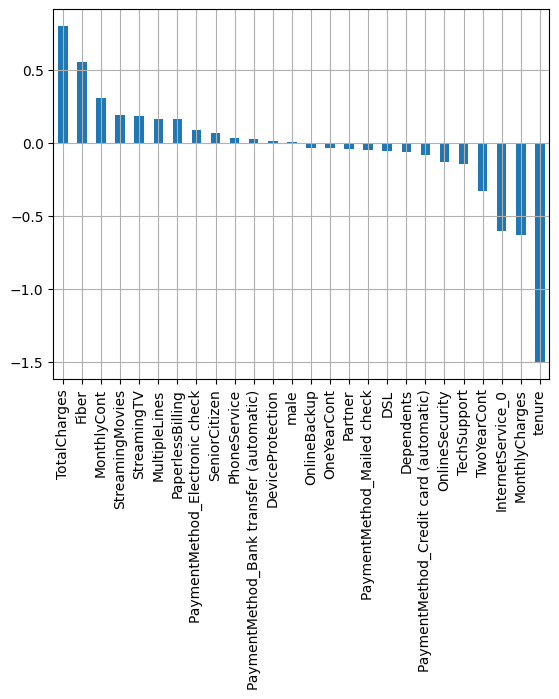

In [25]:
weights.sort_values(ascending=False,inplace=True)
weights.plot.bar()
plt.grid()

### Section 3.4.2 Based on the coefficients and the chart, what is your observation? 

**Q1: What are some of the factors that have the most positive relation with customer churn? What are the factors that have the most negative relation with the customer churn?**

Total Charges, Fiber Optic Internet, Monthly Contract, and having a streaming service are most strongly correlated with
a customer churning. Meanwhile, Tenure, Monthly Charges, Having no internet service, and having a two year contract
are all strongly associated with a customer staying with Telco. 

**Q2: Do those observations align with your earlier analysis in Section 2?**

Partially they align with the analysis from Sec 2. Starting with the contract lengths, it appears that both Monthly
Contract and Two - Year Contract both have the same effects still, however a one-year contract has a more neutral
effect in Section 3 than in Section 2. Total Charges has a completely different effect in Section 3 than in Section 2,
with Total Charges in Section 3 being the most likely to cause churn, while it was the third least-likely to cause churn
in Section 2. I feel like our model incorrectly predicted the impact of Total Charges, and its magnitude in which it changed could have affected the ammount of False Potiives and False Negatives. The same goes for Monthly Charges, it has an opposite affect on churn in our machine learning model compared to our data analysis. Fiber Optic strongly contributed to churn in both sections as well. Having Movie or TV Streaming seemed
to cause churn more in Section 3 than in Section 2. Other than that, everything appeared to be mostly the same or 
it had an insignificant change. 

## Section 4: Conclusion

 * Summarize the main findings and insights from the project.
 * Suggest ways the company can improve the churn rate based on the analysis

### Data Analysis Wrapup
Throughout this analysis on Telco, the tendencies of their customers, and what they purchased, there were a few factors that stood out consistently and significantly. To summarize once more, being a long-tenured customer, having a high monthly bill, having a two or one year contract, having neither of the internet provider services, and having some of the various internet-related packages such as Tech Support and Online Security are all factors that push a customer to stay with Telco. All of these factors were seen to be inversely related to churn in both our data analysis and in our machine learning model that predicts if a customer will churn. On the contrary, having fiber optic internet and having either movie streaming or television streaming contributed towards a customer churning. 

Now, we can see that in our data analysis, Total Charges was inversely related to churn while Monthly Charges was directly related to churn. However, in our machine learning model they both flipped: Total Charges was now directly related to churn and Monthly Charges were inversely related to churn. Despite this change, I am going to stick with the data analysis' showings on Total Charges and Monthly Charges and say that Total Charges play a significant factor in preventing churn and that Monthly Charges play a significant factor in causing churn. This is because all throughout our data analysis, specifically in the boxplot, we see evidence that upholds this. In addition, it makes sense that a long-tenured customer would have more total charges, and that they would both have the same effect on churn, and not opposites. 

### Resultant from our data analyis, I would recommend Telco do the following:
- **Invest money into improving fiber optic internet and DSL internet:** Fiber Optic is one of the strongest factors contributing to churn, and it is clear as day that Telco customers are not happy at all with their fiber optic internet. Telco should invest money into improving fiber optic especially as it rises in popularity among homeowners or they risk more unhappy customers. DSL was not as bad as fiber optic, and infact was always inversely related to churn. However, you can see how impactful having no internet was on a customer staying with Telco. I think it is safe to say that Telco can greatly improve in the internet which they offer. 
- **Give incentive for one and two year contracts:** We see that customers who are on one and two year contracts are less likely to churn than customers on monthly contracts. Whether it be a temporary discounted rate, free packages for upgrading, or anything else, having more people on longer contracts will keep customers more likely to stay. In addition, that increases their tenure and total charges also. Looking at our bar graph comparing various categories' variance from contract to contract, customers with longer contracts also tend to spend more money on additional packages from Telco. Speaking of internet packages...
- **Encourage customers to purchase internet packages:** Although their overall influence may be small, it is consistent throughout our study and should not be neglected. Similar with the contracts, try and get more customers to buy internet-related packages. It is clear that current customers with these packages enjoy them. 
- **Improve quality of Movie and TV Streaming:** Telco's streaming services were not drastically correlated with churn, it is significant enough to be brought up. I'd recommend Telco survey their customers and see what they may be unhappy with about their stremaing services. Is there a poor selection of things to watch? Maybe their app has a poor graphical interface and is hard to navigate? Or their streaming could buffer frequently while trying to watch. There are loads of things that could cause people to be unhappy with their streaming services, so finding out more information about this and trying to improve them could turn something that pushes customers away from Telco into something that draws them to Telco.
- **Senior Citizen Discount!:** Being a senior citizen surprisingly relates to a customer churning. Maybe offering a senior citizen discount can help to somewhat resolve this issue!
- **Family Plan:** We see throughout our analysis that having a partner and/or dependents is likely to keep a customer with Telco. Maybe if a Family Plan is offered, then more people with families will enroll with Telco's services and hopefully become long-tenured customers. 
- **Take Care of Long-Tenure Customers:** Long-tenured customers (assuming that all of them have a decent amount of total charges) are also seen as being the most important factor in keeping a customer at Telco. I would advise that Telco do things every once in a while that makes long-tenured customers feel appreciated. It does not have to be anything big, but atleast something can keep them happy. 

## <span style="color:blue">Wonderful, you are done! It has been a fun semester. Have a nice summer!